In [1]:
# Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

np.random.seed(42)

In [40]:
# Import data

cwd = Path.cwd()
datapath = (cwd.parent.parent / 'problem-sets/PS2/data/').resolve()

df1 = pd.read_csv(datapath / 'ds1_a.csv')
df2 = pd.read_csv(datapath / 'ds1_b.csv')

In [41]:
df1.head(5)

,y,x0,x1
0,-1.0,0.601266,0.165091
1,1.0,0.871725,0.527361
2,-1.0,0.372548,0.446609
3,-1.0,0.013577,0.051358
4,1.0,0.583032,0.710619


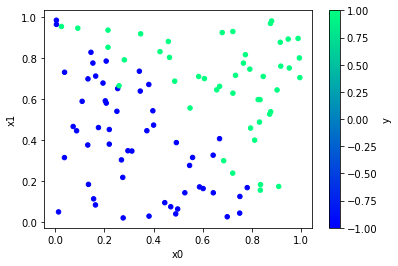

In [45]:
fig, ax = plt.subplots()
sc = df1.plot.scatter(x='x0', y='x1', c='y', colormap='winter', ax=ax)

In [42]:
df2.head(5)

,y,x0,x1
0,-1.0,0.595663,0.193072
1,-1.0,0.436997,0.544807
2,1.0,0.899945,0.845922
3,-1.0,0.555064,0.009263
4,-1.0,0.074687,0.282845


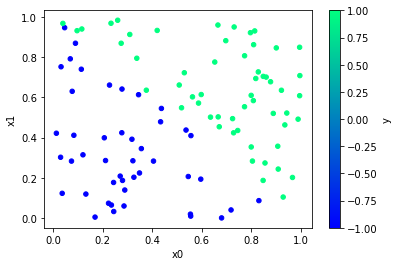

In [46]:
fig, ax = plt.subplots()
sc = df2.plot.scatter(x='x0', y='x1', c='y', colormap='winter', ax=ax)

In [48]:
y1 = df1["y"]
X1 = df1[["x0","x1"]]

y2 = df2["y"]
X2 = df2[["x0","x1"]]

# y = pd.concat([y_train,y_test])
# X = pd.concat([X_train,X_test])

In [72]:
log_clf1 = LogisticRegression(random_state=42)
log_clf1.fit(X1, y1)
y1_pred = log_clf1.predict(X1)
print(log_clf1.__class__.__name__, "1", accuracy_score(y1, y1_pred))

log_clf2 = LogisticRegression(random_state=42)
log_clf2.fit(X2, y2)
y2_pred = log_clf2.predict(X2)
print(log_clf2.__class__.__name__, "2", accuracy_score(y2, y2_pred))

LogisticRegression 1 0.9
LogisticRegression 2 0.94


In [73]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 1, 0, 1], alpha=0.5, contour=True): # axes=[0, 8, 0, 8]
    X = X.to_numpy() # as_matrix() # added code to convert dataframe X to array X
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==-1], X[:, 1][y==-1], "yo", alpha=alpha) # 0
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

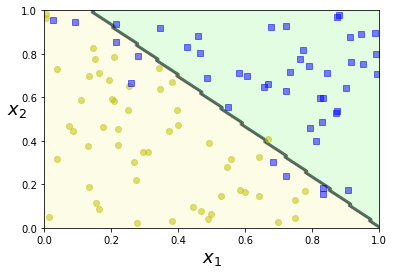

In [70]:
plot_decision_boundary(log_clf1, X1, y1)

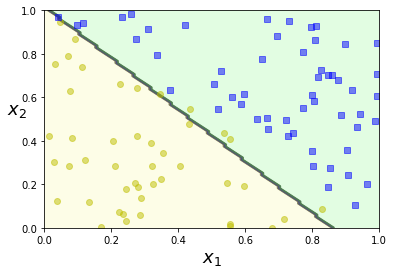

In [71]:
plot_decision_boundary(log_clf2, X2, y2)

In [75]:
# Does SVM do better?

from sklearn.svm import SVC

svm_clf1 = SVC(random_state=42)
svm_clf1.fit(X1, y1)
y1_pred = svm_clf1.predict(X1)
print(svm_clf1.__class__.__name__, "1", accuracy_score(y1, y1_pred))

svm_clf2 = SVC(random_state=42)
svm_clf2.fit(X2, y2)
y2_pred = svm_clf2.predict(X2)
print(svm_clf2.__class__.__name__, "2", accuracy_score(y2, y2_pred))

SVC 1 0.92
SVC 2 0.97


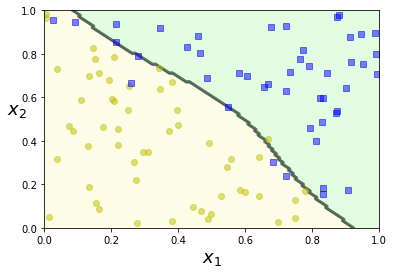

In [76]:
plot_decision_boundary(svm_clf1, X1, y1)

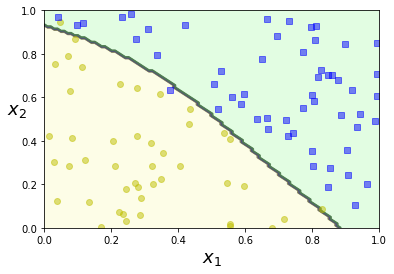

In [77]:
plot_decision_boundary(svm_clf2, X2, y2)